In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

[]

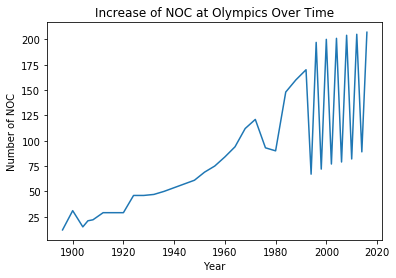

In [3]:
x = pd.DataFrame(data.groupby('Year').NOC.nunique()).reset_index()
plt.xlabel('Year')
plt.ylabel('Number of NOC')
plt.title('Increase of NOC at Olympics Over Time')
plt.plot(x['Year'], x['NOC'])
plt.plot()

We see a general increase in NOC. Huge decline in 1980, due to the collective boycotting of the 1980 Olympic Summer Games due to the actions of the Soviet Union against Afghanistan in 1979.

In [4]:
y = pd.DataFrame(data.groupby('Year').ID.nunique()).reset_index()
#plt.plot(y['Year'],y['ID'])
#plt.show()

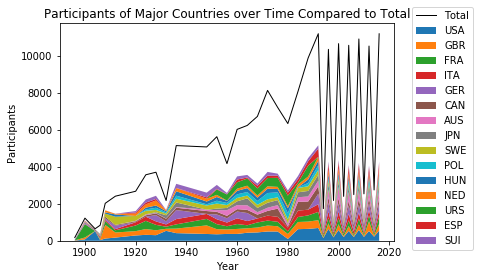

In [5]:
k = pd.DataFrame(data.groupby(['Year','NOC']).ID.nunique()).reset_index()

a = k.pivot(index='Year', columns = 'NOC', values='ID').fillna(0)
a_sub = a.sum(axis=0).sort_values(ascending=False).head(15).index.values
a_part = a.loc[:, a_sub]

plt.stackplot(a_part.index, np.transpose(a_part), labels = a_part.columns)
plt.plot(y['Year'], y['ID'], linewidth=1, color='black', label = "Total")
plt.legend(bbox_to_anchor=(1.25,1.1))
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Participants of Major Countries over Time Compared to Total')
plt.show()

Participants per Country growth shows that the top 15 countries have continued to increase since the 1980 boycott. We see that the total participant count of these 15 countries roughly equate to half of the total participants for most of the Olympics Games(despite over 100 Olympic Committees by 1976).

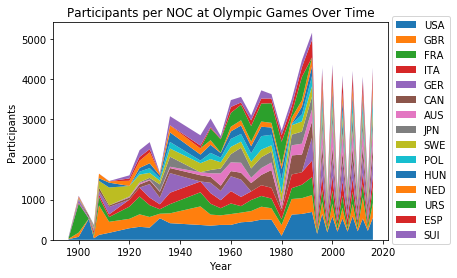

In [6]:
plt.stackplot(a_part.index, np.transpose(a_part), labels = a_part.columns)
plt.legend(bbox_to_anchor=(1.2,1.05))
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Participants per NOC at Olympic Games Over Time')
plt.show()

Historically, Great Britain and the US have been the primary source of participants at the early Olympic Games. However, we see that the diversity improves closer to 1940 and by 1992 we see a huge spike in participants from these nations.

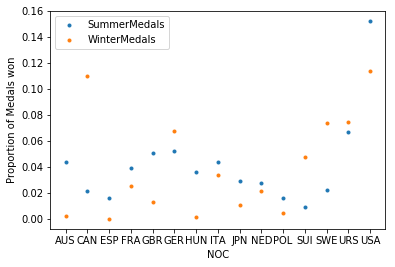

In [31]:
a2 = data[data['Year'] >= 1994]
a2 = a2.groupby('Season').Event.unique()

summer = a2.Summer
winter = a2.Winter

summerevents = data[data.Event.isin(summer) == True]
winterevents = data[data.Event.isin(winter) == True]

d = pd.merge(summerevents.groupby('NOC').Medal.count().reset_index(), winterevents.groupby('NOC').Medal.count().reset_index(), on = 'NOC')
d.columns = ['NOC', 'SummerMedals', 'WinterMedals']
d = d.set_index('NOC')

d['SummerMedals'] = d['SummerMedals']/sum(d['SummerMedals'])
d['WinterMedals'] = d['WinterMedals']/sum(d['WinterMedals'])


c = d[d.index.isin(a_part) == True]
plt.plot(c, '.')
plt.xlabel('NOC')
plt.ylabel('Proportion of Medals won')
plt.legend(loc='upper left', labels = ('SummerMedals', 'WinterMedals'))
plt.show()

We see that for some countries, they earn very similar proportions of medals for both Summer events and Winter events. However, there are also countries that do significantly better in one version of the Olympic games than the other. For example, we see that Canada performs well in Winter events, but not as well in Summer events.